# Introduction to GeoPandas


## Table of Contents

1. [GeoDataFrame](#GeoDataFrames)<br>
2. [Attributes and methods](#attributes)<br>
3. [Points vs Lines vs Polygons](#geometry)<br>
4. [Overlay](#overlay)<br>
5. [Buffer](#buffer)<br>
6. [Spatial relationships](#spatial)<br>
7. [London boroughs](#boroughs)<br>
    7.1. [Load geospatial data](#load1)<br>
    7.2. [Explore data](#explore1)<br>
    7.3. [Dissolve](#dissolve)<br>
    7.4. [Join](#join)<br>
8. [Open Street Map data (OSM)](#osm)<br>
    8.1. [Load data](#load2)<br>
    8.2. [Explore data](#explore2)<br>


<div class="alert alert-danger" style="font-size:100%">
If you are using <b>Watson Studio</b> to run the workshop you will need to add the project token to your notebook that you created earlier to be able to access the shape files from your Cloud Object Store (COS). 

Click the 3 dots at the top right side of the notebook to insert the project token. This will create a new cell in the notebook that you will need to run first before continuing with the rest of the notebook. If you are sharing this notebook you should remove this cell, else anyone can use you Cloud Object Storage from this project.

If you cannot find the new cell it is probably at the top of this notebook. Scroll up, run the cell and continue with the rest of the notebook below.

</div> 

In [3]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt

%matplotlib inline

<a id="GeoDataFrames"></a>
## 1. GeoDataFrame
GeoPandas extends two of its main data structures namely **GeoSeries** and **GeoDataFrame** from pandas. GeoSeries, much like pandas' *Series* is a vector in which each entry represents one or more shapes corresponding to a row. GeoDataFrame, much like pandas' *DataFrame* is a two dimensional data structure that has a column which is the GeoSeries along with other information. The GeoSeries column within the GeoDataFrame is referred to as the *geometry* of it. 



Below the latitude and longitude of 5 cities are used to create a `POINT` geometry variable that is used to create a `GeoDataFrame` from a `DataFrame`: 

In [4]:
df = pd.DataFrame({'city':       ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'population': [9787426,  2553379,     2440986,    1777934, 1209143],
        'area':       [1737.9,   630.3,       598.9,      487.8,   368.5 ],
        'latitude':   [51.50853, 53.48095,    52.48142,   53.79648,55.86515],
        'longitude':  [-0.12574, -2.23743,    -1.89983,   -1.54785,-4.25763]})

df.head()

,city,population,area,latitude,longitude
0,London,9787426,1737.9,51.50853,-0.12574
1,Manchester,2553379,630.3,53.48095,-2.23743
2,Birmingham,2440986,598.9,52.48142,-1.89983
3,Leeds,1777934,487.8,53.79648,-1.54785
4,Glasgow,1209143,368.5,55.86515,-4.25763


In [5]:
df['point']  = list(zip(df.longitude, df.latitude))
df['geometry'] = df['point'].apply(Point)
df.head()

,city,population,area,latitude,longitude,point,geometry
0,London,9787426,1737.9,51.50853,-0.12574,"(-0.12574, 51.50853)",POINT (-0.12574 51.50853)
1,Manchester,2553379,630.3,53.48095,-2.23743,"(-2.23743, 53.48095)",POINT (-2.23743 53.48095)
2,Birmingham,2440986,598.9,52.48142,-1.89983,"(-1.89983, 52.48142)",POINT (-1.89983 52.48142)
3,Leeds,1777934,487.8,53.79648,-1.54785,"(-1.54785, 53.79648)",POINT (-1.54785 53.79648)
4,Glasgow,1209143,368.5,55.86515,-4.25763,"(-4.25763, 55.86515)",POINT (-4.25763 55.86515)


In [6]:
df = df.drop('point', 1)
cities = gpd.GeoDataFrame(df, geometry='geometry')
cities.head()

,city,population,area,latitude,longitude,geometry
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853)
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095)
2,Birmingham,2440986,598.9,52.48142,-1.89983,POINT (-1.89983 52.48142)
3,Leeds,1777934,487.8,53.79648,-1.54785,POINT (-1.54785 53.79648)
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515)


<a id="attributes"></a>
## 2. Attributes and methods 
But there are additional methods you can use from the [geopandas documentation](http://geopandas.org/data_structures.html#overview-of-attributes-and-methods)):

We can explore a few of these with the cities data:


As `cities` is still a DataFrame you can apply the same data manipulations, for instance:

In [7]:
cities['population'].mean()

3553773.6

In [8]:
cities['area'].min()

368.5

In [9]:
cities['density'] = cities['population']/cities['area']
cities

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
2,Birmingham,2440986,598.9,52.48142,-1.89983,POINT (-1.89983 52.48142),4075.782267
3,Leeds,1777934,487.8,53.79648,-1.54785,POINT (-1.54785 53.79648),3644.801148
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


In [10]:
cities.area

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [11]:
cities.total_bounds

array([-4.25763, 51.50853, -0.12574, 55.86515])

In [12]:
cities.geom_type

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [13]:
cities.distance(cities.geometry[0])

0    0.000000
1    2.889580
2    2.023341
3    2.693903
4    6.004386
dtype: float64

In [14]:
cities2 = cities.copy()
cities2 = cities2.drop([2,3])
cities2.head()

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


In [15]:
cities2.area

0    0.0
1    0.0
4    0.0
dtype: float64

In [16]:
cities2.bounds

,minx,miny,maxx,maxy
0,-0.12574,51.50853,-0.12574,51.50853
1,-2.23743,53.48095,-2.23743,53.48095
4,-4.25763,55.86515,-4.25763,55.86515


In [17]:
cities2.geom_type

0    Point
1    Point
4    Point
dtype: object

In [18]:
cities2.centroid

0    POINT (-0.12574 51.50853)
1    POINT (-2.23743 53.48095)
4    POINT (-4.25763 55.86515)
dtype: object

In [19]:
cities2.representative_point()

0    POINT (-0.12574 51.50853)
1    POINT (-2.23743 53.48095)
4    POINT (-4.25763 55.86515)
dtype: object

<a id="geometry"></a>
## 3. Points vs Lines vs Polygons
For the other attributes and methods we need some more data. 






* A point by squeezing out the geometry

In [20]:
lon_point = cities.loc[cities['city'] == 'London', 'geometry'].squeeze()
man_point = cities.loc[cities['city'] == 'Manchester', 'geometry'].squeeze()
birm_point = cities.loc[cities['city'] == 'Birmingham', 'geometry'].squeeze()
leeds_point = cities.loc[cities['city'] == 'Leeds', 'geometry'].squeeze()

* A line between 2 cities by creating a LineString between 2 points

In [21]:
lon_man_line = gpd.GeoSeries(LineString([lon_point, man_point]))
man_birm_line = gpd.GeoSeries(LineString([man_point, birm_point]))
birm_lon_line = gpd.GeoSeries(LineString([birm_point,lon_point]))
leeds_man_line = gpd.GeoSeries(LineString([leeds_point, man_point]))
birm_leeds_line = gpd.GeoSeries(LineString([birm_point,leeds_point]))

* A polygon between 3 cities by creating a Polygon between 3 points

In [22]:
Polygon([[lon_point.x,lon_point.y],[man_point.x,man_point.y],[lon_point.x,lon_point.y]])
lon_man_birm_polygon = gpd.GeoSeries(Polygon([[lon_point.x,lon_point.y],[man_point.x,man_point.y],[birm_point.x,birm_point.y],[lon_point.x,lon_point.y]]))
leeds_man_birm_polygon = gpd.GeoSeries(Polygon([[leeds_point.x,leeds_point.y],[man_point.x,man_point.y],[birm_point.x,birm_point.y]]))

And plot all of them together:

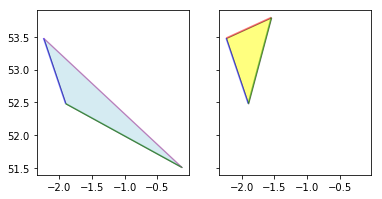

In [23]:
fig, (poly1,poly2) = plt.subplots(ncols=2, sharex=True, sharey=True)

lon_man_birm_polygon.plot(ax=poly1, color='lightblue', edgecolor='black',alpha=0.5);
lon_man_line.plot(ax=poly1,color='violet',alpha=0.5);
man_birm_line.plot(ax=poly1,color='blue',alpha=0.5);
birm_lon_line.plot(ax=poly1,color='green',alpha=0.5);

leeds_man_birm_polygon.plot(ax=poly2, color='yellow', edgecolor='black',alpha=0.5);
leeds_man_line.plot(ax=poly2,color='red',alpha=0.5);
man_birm_line.plot(ax=poly2,color='blue',alpha=0.5);
birm_leeds_line.plot(ax=poly2,color='green',alpha=0.5);

With these new shapes let's explore some more methods.

<a id="overlay"></a>
## 4. Overlay
To observe interactions between more than one datasets, we use the overlay library. *union*, *difference*, *symmetrical difference* and *intersection* are some of the operations that can be performed. 


Below is a graph showing the union of the two polygons displayed in teh graph above.

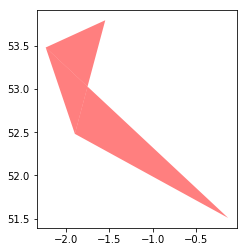

In [24]:
poly1 = gpd.GeoDataFrame({'geometry': lon_man_birm_polygon})
poly2 = gpd.GeoDataFrame({'geometry': leeds_man_birm_polygon})

gpd.overlay( poly1, poly2, how='union').plot(color='red',alpha=0.5);

<a id="buffer"></a>
## 5. Buffer


* Circles around the cities by adding a buffer around the points
Polygons can be of any shape as you will see later in the workshop, using circles here as a quick example. 

In [25]:
cities1 = cities[0:1].copy()
cities1.head()

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416


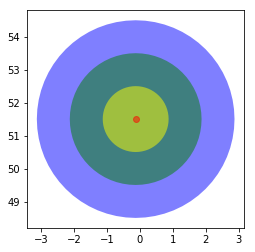

In [26]:
base = cities1.buffer(3).plot(color='blue',alpha=0.5);
cities1.buffer(2).plot(ax=base,color='green',alpha=0.5);
cities1.buffer(1).plot(ax=base,color='yellow',alpha=0.5);
cities1.plot(ax=base,color='red',alpha=0.5);

<a id="spatial"></a>
## 6. Spatial relationships

What can you do with geospatial relationships?  

There are several functions to check geospatial relationships between geometries: `equals`, `contains`, `crosses`, `disjoint`,`intersects`,`overlaps`,`touches`,`within` and `covers`. These all use the `shapely` package about which you can read more [here](https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships) and some more background on spatial relationships [here](https://en.wikipedia.org/wiki/Spatial_relation).

A few examples:

In [27]:
cities.head()

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
2,Birmingham,2440986,598.9,52.48142,-1.89983,POINT (-1.89983 52.48142),4075.782267
3,Leeds,1777934,487.8,53.79648,-1.54785,POINT (-1.54785 53.79648),3644.801148
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


In [28]:
cities2.head()

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


In [29]:
cities.contains(cities2)

0     True
1     True
2    False
3    False
4     True
dtype: bool

In [30]:
cities2.contains(lon_point)

0     True
1    False
4    False
dtype: bool

In [31]:
cities2[cities2.contains(lon_point)]

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416


In [32]:
cities2[cities2.contains(man_point)]

,city,population,area,latitude,longitude,geometry,density
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467


The inverse of `contains`:

In [33]:
cities[cities.within(cities2)]

,city,population,area,latitude,longitude,geometry,density
0,London,9787426,1737.9,51.50853,-0.12574,POINT (-0.12574 51.50853),5631.754416
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


In [34]:
cities2.intersects(lon_man_line)

0     True
1    False
4    False
dtype: bool

In [35]:
cities2[cities2.crosses(man_birm_line)]

,city,population,area,latitude,longitude,geometry,density


In [36]:
cities2[cities2.disjoint(lon_point)]

,city,population,area,latitude,longitude,geometry,density
1,Manchester,2553379,630.3,53.48095,-2.23743,POINT (-2.23743 53.48095),4051.053467
4,Glasgow,1209143,368.5,55.86515,-4.25763,POINT (-4.25763 55.86515),3281.256445


<a id="boroughs"></a>
## 7. London boroughs



<a id="load1"></a>
### 7.1 Load geospatial data

Geospatial data comes in many formats, but with GeoPandas you can read most files with just one command. For example this geojson file with the London boroughs: 



In [37]:
# load data from a url
boroughs = gpd.read_file("https://skgrange.github.io/www/data/london_boroughs.json")
boroughs.head()

,id,name,code,area_hectares,inner_statistical,geometry
0,1,Kingston upon Thames,E09000021,3726.117,0,(POLYGON ((-0.330679062942453 51.3290110106029...
1,2,Croydon,E09000008,8649.441,0,(POLYGON ((-0.064021239620113 51.3186376598749...
2,3,Bromley,E09000006,15013.487,0,"(POLYGON ((0.012130938509177 51.2995990596564,..."
3,4,Hounslow,E09000018,5658.541,0,"(POLYGON ((-0.244562394525054 51.48870217634, ..."
4,5,Ealing,E09000009,5554.428,0,(POLYGON ((-0.411832689731467 51.5340838625761...


<a id="explore1"></a>
### 7.2 Explore  data

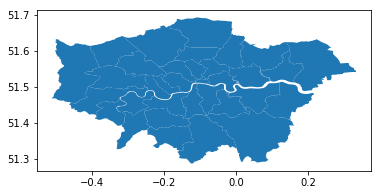

In [38]:
boroughs.plot();

Adding a column will colour the map based on the classes in this column:

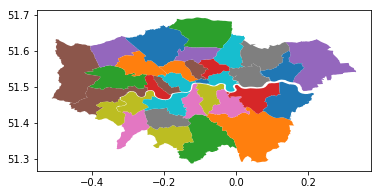

In [39]:
boroughs.plot(column='code');

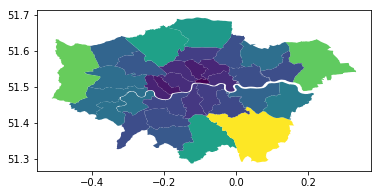

In [40]:
boroughs.plot(column='area_hectares');

<a id="dissolve"></a>
### 7.3 Dissolve

The boroughs are made up of many districts that you might want to combine. For this example this can be done by adding a new column and then use `.dissolve()`:

In [41]:
boroughs['all'] = 1
allboroughs = boroughs.dissolve(by='all',aggfunc='sum')
allboroughs.head()

,geometry,id,area_hectares,inner_statistical
all,,,,
1,"POLYGON ((-0.064021239620113 51.3186376598749,...",561,159469.725,14


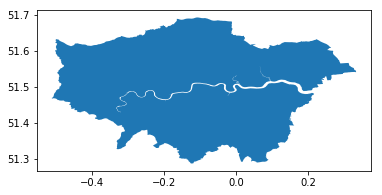

In [42]:
allboroughs.plot();

To change the size of the map and remove the box around the map, run the below:

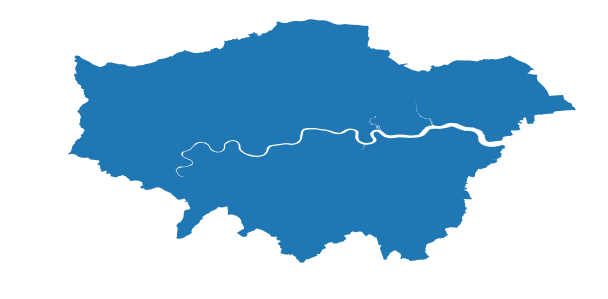

In [43]:
[fig, ax] = plt.subplots(1, figsize=(10, 6))
allboroughs.plot(ax=ax);
ax.axis('off');

<a id="join"></a>
### 7.4 Join

Let's combine the data from the Pandas notebook with the boroughs GeoDataFrame:

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/IBMDeveloperUK/crime-data-workshop/master/data/london-borough-profiles.csv',encoding = 'unicode_escape')

In [45]:
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800.0,5326.0,290.0,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000.0,78188.0,3611.0,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600.0,151423.0,8675.0,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300.0,97736.0,6058.0,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100.0,121048.0,4323.0,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


In [46]:
boroughs.head()

,id,name,code,area_hectares,inner_statistical,geometry,all
0,1,Kingston upon Thames,E09000021,3726.117,0,(POLYGON ((-0.330679062942453 51.3290110106029...,1
1,2,Croydon,E09000008,8649.441,0,(POLYGON ((-0.064021239620113 51.3186376598749...,1
2,3,Bromley,E09000006,15013.487,0,"(POLYGON ((0.012130938509177 51.2995990596564,...",1
3,4,Hounslow,E09000018,5658.541,0,"(POLYGON ((-0.244562394525054 51.48870217634, ...",1
4,5,Ealing,E09000009,5554.428,0,(POLYGON ((-0.411832689731467 51.5340838625761...,1


The columns to join the two tables on are `code` and `Code`. To use the [`join` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html), first the index of both tables has to be set to this column. 

The below adds the columns from `df` to `boroughs`:

In [47]:
boroughs = boroughs.set_index('code').join(df.set_index('Code'))
boroughs.head()

,id,name,area_hectares,inner_statistical,geometry,all,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
E09000001,33,City of London,314.942,1,"(POLYGON ((-0.111574406694964 51.5107549197, -...",1,City of London,Inner London,8800.0,5326.0,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
E09000002,32,Barking and Dagenham,3779.934,0,(POLYGON ((0.07316567606867801 51.529370200593...,1,Barking and Dagenham,Outer London,209000.0,78188.0,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
E09000003,10,Barnet,8674.837,0,(POLYGON ((-0.199896404443971 51.6701668576827...,1,Barnet,Outer London,389600.0,151423.0,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
E09000004,15,Bexley,6428.649,0,"(POLYGON ((0.120210839063794 51.5114446653239,...",1,Bexley,Outer London,244300.0,97736.0,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
E09000005,9,Brent,4323.270,0,(POLYGON ((-0.196568746300418 51.5276540106305...,1,Brent,Outer London,332100.0,121048.0,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


Below is a map that shows two regions: Inner and Outer London


In [48]:
boroughs2 = boroughs.dissolve(by='Inner/_Outer_London',aggfunc='mean')
boroughs2.head()

,geometry,id,area_hectares,inner_statistical,all,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017",...,Worthwhileness_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
Inner/_Outer_London,,,,,,,,,,,,,,,,,,,,,
Inner London,"(POLYGON ((0.075487345438734 51.5298237426242,...",23.857143,2341.884643,1.0,1.0,252550.000000,108752.928571,2280.5,110.850000,35.550000,...,7.478571,7.135714,3.578571,23.684615,5.085714,184.785714,23.646154,69.207692,3.507692,37.446154
Outer London,(POLYGON ((-0.024847351506038 51.4855462016976...,11.947368,6667.544211,0.0,1.0,278931.578947,109443.210526,6594.0,47.673684,36.984211,...,7.631579,7.263158,3.200000,21.963158,6.394737,162.578947,38.915789,48.544444,8.721053,39.794737


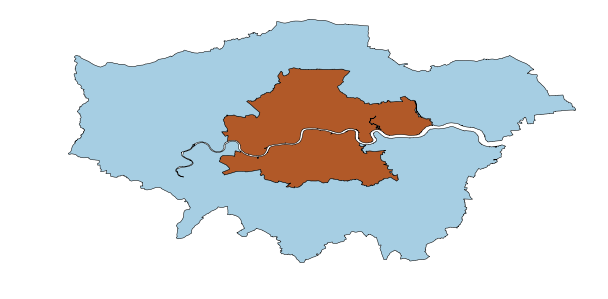

In [49]:
[fig, ax] = plt.subplots(1, figsize=(10, 6))
boroughs2.plot(column='id', cmap='Paired', linewidth=0.5, edgecolor='black', legend=False, ax=ax);
ax.axis('off');

Below is a map of the average gender pay gap for each borough.


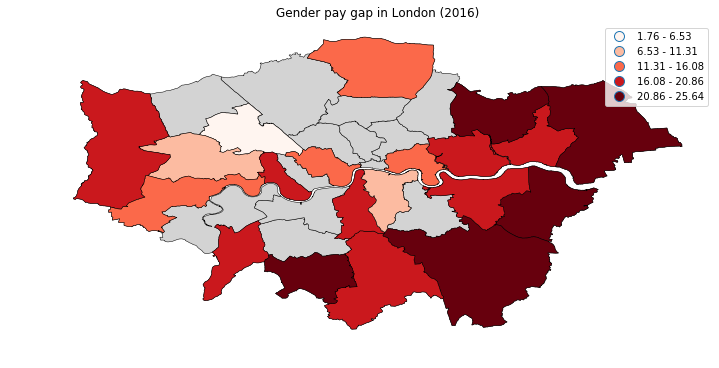

In [50]:
boroughs['paygap'] = \
    ((boroughs['Gross_Annual_Pay_-_Male_(2016)'] - boroughs['Gross_Annual_Pay_-_Female_(2016)'])/ \
    boroughs['Gross_Annual_Pay_-_Male_(2016)']) * 100

[fig,ax] = plt.subplots(1, figsize=(12, 8))

boroughs.plot(ax=ax, color="lightgrey", edgecolor='black', linewidth=0.5)

boroughs.dropna().plot(column='paygap', cmap='Reds', edgecolor='black', linewidth=0.5,
               legend=True, ax=ax, scheme='equal_interval');
ax.axis('off');
ax.set_title('Gender pay gap in London (2016)');


<a id="osm"></a>
## 8. Open Street Map data (OSM)

<a id="load2"></a>
### 8.1 Load OSM data

Data is downloaded from http://download.geofabrik.de/europe/great-britain.html and a more detailed decription of the data is [here](http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf).

The following code was run to extract vector data around just london and import it to a local file. 

xmin, ymin, xmax, ymax = london.total_bounds <br>
pois_all = gpd.read_file("../data/england-latest-free/gis_osm_pois_free_1.shp") <br>
pois = pois_all.cx[xmin:xmax, ymin:ymax] <br>
pois.to_file("../data/london_pois.shp") <br>

The data format is a shape file that consists of several files combined into one zip file that can be read directly with GeoPandas:

<div class="alert alert-danger" style="font-size:100%">
If you are using <b>Watson Studio</b> to run the workshop you will get an error with the above, because you have no local files in the data folder. First store the file <b><font face="Courier">london_pois.zip</font></b> in your Cloud Object Store (COS) through the menu at the right of the notebook (if you see no menu, click the <b><font face="Courier">1010</font></b> button at the top first). Then load the data into the notebook by running the following two cells (<b>do not forget to uncomment the second cell</b>):
</div> 

In [51]:
# define the helper function 
def download_file_to_local(project_filename, local_file_destination=None, project=None):
    """
    Uses project-lib to get a bytearray and then downloads this file to local.
    Requires a valid `project` object.
    
    Args:
        project_filename str: the filename to be passed to get_file
        local_file_destination: the filename for the local file if different
        
    Returns:
        0 if everything worked
    """
    
    project = project
    
    # get the file
    print("Attempting to get file {}".format(project_filename))
    _bytes = project.get_file(project_filename).read()
    
    # check for new file name, download the file
    print("Downloading...")
    if local_file_destination==None: local_file_destination = project_filename
    
    with open(local_file_destination, 'wb') as f: 
        f.write(bytearray(_bytes))
        print("Completed writing to {}".format(local_file_destination))
        
    return 0

In [52]:
download_file_to_local('london_pois.zip', project=project)
zipfile = "zip://./london_pois.zip!london_pois/london_pois.dbf"
pois = gpd.read_file(zipfile)


Attempting to get file london_pois.zip
Downloading...
Completed writing to london_pois.zip


In [53]:
pois.head()

,osm_id,code,fclass,name,geometry
0,108042,2304,pub,Simmons,POINT (-0.1355294 51.5235359)
1,108539,2566,bicycle_rental,Windsor Terrace,POINT (-0.09338780000000001 51.5291251)
2,283885,2204,park,Ecology Park,POINT (0.0155831 51.494974)
3,451152,2304,pub,The Dignity,POINT (-0.1946078 51.6008404)
4,451153,2301,restaurant,Central Restaurant,POINT (-0.1935029 51.6020306)


<a id="explore2"></a>
### 8.2 Explore OSM data

In [54]:
pois.size

303130

In [55]:
pois['fclass'].unique()

array(['pub', 'bicycle_rental', 'park', 'restaurant', 'post_box',
       'post_office', 'library', 'memorial', 'telephone',
       'public_building', 'fountain', 'artwork', 'museum', 'police',
       'toilet', 'cafe', 'pitch', 'recycling', 'bar', 'attraction', 'atm',
       'swimming_pool', 'kindergarten', 'cinema', 'waste_basket',
       'monument', 'college', 'university', 'supermarket', 'graveyard',
       'hotel', 'laundry', 'courthouse', 'school', 'sports_centre',
       'pharmacy', 'convenience', 'bank', 'beverages', 'fast_food',
       'fire_station', 'water_tower', 'doctors', 'department_store',
       'theatre', 'viewpoint', 'playground', 'newsagent', 'gift_shop',
       'clothes', 'recycling_paper', 'veterinary', 'wastewater_plant',
       'dentist', 'recycling_glass', 'chemist', 'hospital', 'town_hall',
       'tourist_info', 'bicycle_shop', 'car_rental', 'bakery',
       'travel_agent', 'doityourself', 'windmill', 'comms_tower',
       'car_sharing', 'camera_surveillance', 

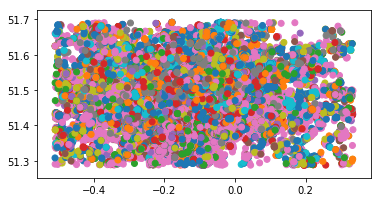

In [56]:
pois.plot(column='fclass');

Let's count and plot the number of pubs by borough by:

* checking the coordinate systems of the maps to combine. They need to be the same to use them together.
* extracting the pubs from the `pois` DataFrame
* joining the tables into a temporary table
* counting the number of pubs in each borough
* merging this new table back into the `boroughs` DataFrame

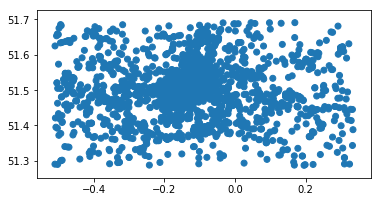

In [57]:
pois[pois.fclass=='pub'].plot(column='fclass');

The coordinate reference system (CRS) determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth.

In [58]:
print(pois.crs)
print(boroughs.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


In [59]:
pubs = pois[pois['fclass']=='pub']
pubs.head()

,osm_id,code,fclass,name,geometry
0,108042,2304,pub,Simmons,POINT (-0.1355294 51.5235359)
3,451152,2304,pub,The Dignity,POINT (-0.1946078 51.6008404)
5,451154,2304,pub,The Catcher in the Rye,POINT (-0.1960052 51.5995863)
6,451271,2304,pub,The Tally Ho,POINT (-0.1765046 51.6141038)
12,12242503,2304,pub,Railway Bell,POINT (0.0279621 51.5920158)


In [60]:
pubs2 = gpd.sjoin(boroughs,pubs) 
pubs2.head()

,id,name_left,area_hectares,inner_statistical,geometry,all,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,...,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,paygap,index_right,osm_id,code,fclass,name_right
E09000001,33,City of London,314.942,1,"(POLYGON ((-0.111574406694964 51.5107549197, -...",1,City of London,Inner London,8800.0,5326.0,...,NaN,NaN,NaN,NaN,NaN,5709,316763478,2304,pub,The Paternoster
E09000001,33,City of London,314.942,1,"(POLYGON ((-0.111574406694964 51.5107549197, -...",1,City of London,Inner London,8800.0,5326.0,...,NaN,NaN,NaN,NaN,NaN,59,21693791,2304,pub,The Saint
E09000001,33,City of London,314.942,1,"(POLYGON ((-0.111574406694964 51.5107549197, -...",1,City of London,Inner London,8800.0,5326.0,...,NaN,NaN,NaN,NaN,NaN,41578,4009487830,2304,pub,City Bar & Kitchen
E09000001,33,City of London,314.942,1,"(POLYGON ((-0.111574406694964 51.5107549197, -...",1,City of London,Inner London,8800.0,5326.0,...,NaN,NaN,NaN,NaN,NaN,5405,306478017,2304,pub,The Telegraph
E09000001,33,City of London,314.942,1,"(POLYGON ((-0.111574406694964 51.5107549197, -...",1,City of London,Inner London,8800.0,5326.0,...,NaN,NaN,NaN,NaN,NaN,3622,276920899,2304,pub,The Gable


In [61]:
pubs3 = pd.pivot_table(pubs2,index='name_left',columns='fclass',aggfunc={'fclass':'count'})
pubs3.columns = pubs3.columns.droplevel()
pubs3 = pubs3.reset_index()
pubs3.head()

fclass,name_left,pub
0,Barking and Dagenham,9
1,Barnet,42
2,Bexley,60
3,Brent,25
4,Bromley,81


In [62]:
boroughs = boroughs.merge(pubs3, left_on='name',right_on='name_left')
boroughs = boroughs.drop(columns='name_left')
boroughs.head()

,id,name,area_hectares,inner_statistical,geometry,all,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,...,Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections,paygap,pub
0,33,City of London,314.942,1,"(POLYGON ((-0.111574406694964 51.5107549197, -...",1,City of London,Inner London,8800.0,5326.0,...,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN,NaN,95
1,32,Barking and Dagenham,3779.934,0,(POLYGON ((0.07316567606867801 51.529370200593...,1,Barking and Dagenham,Outer London,209000.0,78188.0,...,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5,18.276641,9
2,10,Barnet,8674.837,0,(POLYGON ((-0.199896404443971 51.6701668576827...,1,Barnet,Outer London,389600.0,151423.0,...,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5,14.366004,42
3,15,Bexley,6428.649,0,"(POLYGON ((0.120210839063794 51.5114446653239,...",1,Bexley,Outer London,244300.0,97736.0,...,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6,23.645099,60
4,9,Brent,4323.270,0,(POLYGON ((-0.196568746300418 51.5276540106305...,1,Brent,Outer London,332100.0,121048.0,...,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3,1.755783,25


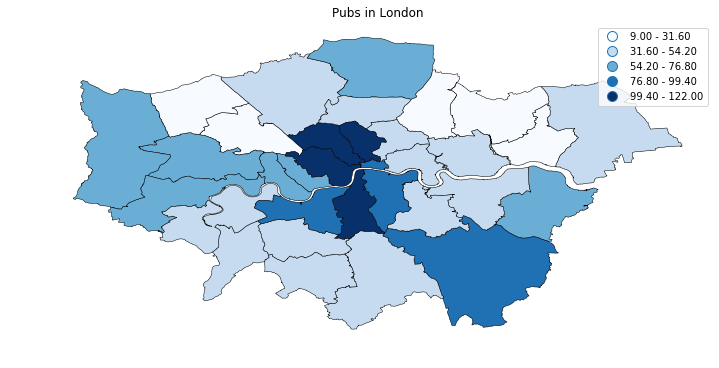

In [63]:
[fig,ax] = plt.subplots(1, figsize=(12, 8))

boroughs.plot(column='pub',cmap='Blues', edgecolor='black', linewidth=0.5, 
              legend=True, ax=ax, scheme='equal_interval');
ax.axis('off');
ax.set_title('Pubs in London');



A different way to visualize this is with a heatmap:

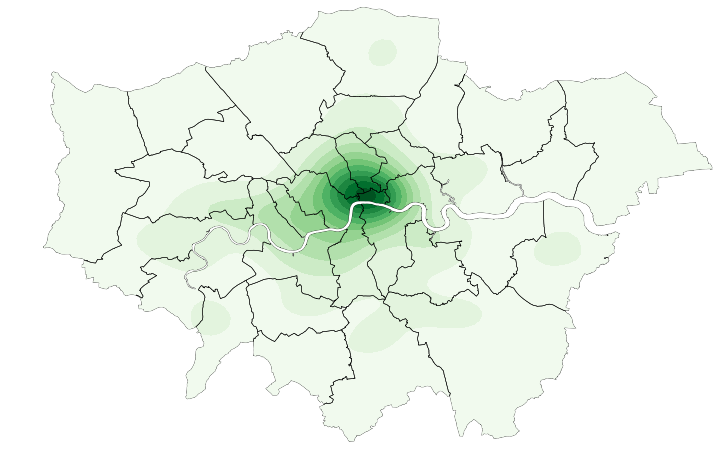

In [64]:
import geoplot 
[fig,ax] = plt.subplots(1, figsize=(12, 8))

geoplot.kdeplot(
    pubs, clip=boroughs.geometry, n_levels=10, 
    shade=True, cmap='Greens', ax=ax)
geoplot.polyplot(boroughs, ax=ax, alpha=1, edgecolor='black', linewidth=0.5)

Below is a map that only shows all points of one of the POI classes for one of the boroughs


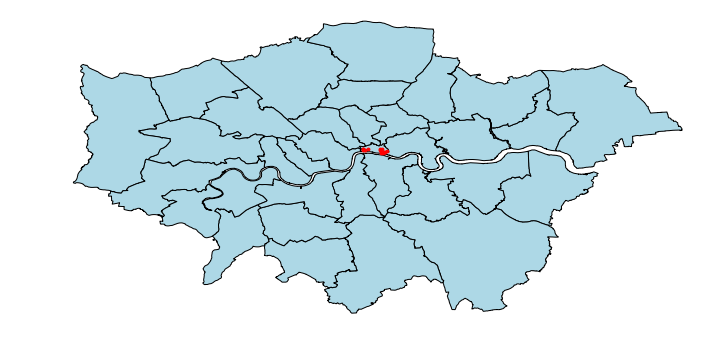

In [65]:
hotels = pois[pois['fclass']=='hotel']
citylondon = boroughs.loc[boroughs['name'] == 'City of London', 'geometry'].squeeze()
cityhotels = hotels[hotels.within(citylondon)]

[fig,ax] = plt.subplots(1, figsize=(12, 8))
base = boroughs.plot(color='lightblue', edgecolor='black',ax=ax);
cityhotels.plot(ax=ax, marker='o', color='red', markersize=8);
ax.axis('off');


Below is a map showing a new POI class being added to the boroughs table.

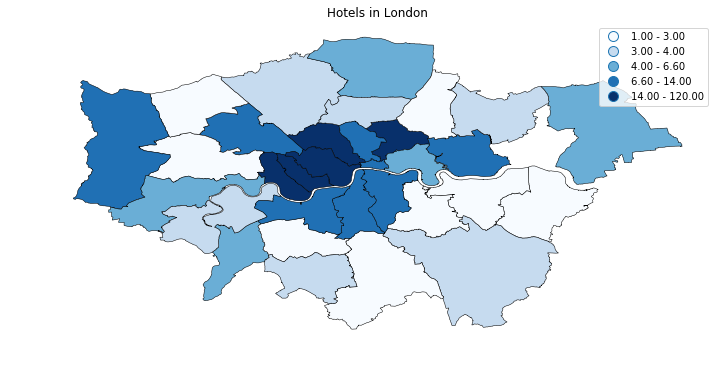

In [66]:
hotels2 = gpd.sjoin(boroughs,hotels) 
hotels3 = pd.pivot_table(hotels2,index='name_left',columns='fclass',aggfunc={'fclass':'count'})
hotels3.columns = hotels3.columns.droplevel()
hotels3 = hotels3.reset_index()

boroughs = boroughs.merge(hotels3, left_on='name',right_on='name_left')
boroughs = boroughs.drop(columns='name_left')

[fig,ax] = plt.subplots(1, figsize=(12, 8))

boroughs.plot(column='hotel',cmap='Blues', edgecolor='black', linewidth=0.5, 
              legend=True, ax=ax, scheme='quantiles');
ax.axis('off');
ax.set_title('Hotels in London');


### Author
Margriet Groenendijk is a Data & AI Developer Advocate for IBM. She develops and presents talks and workshops about data science and AI. She is active in the local developer communities through attending, presenting and organising meetups. She has a background in climate science where she explored large observational datasets of carbon uptake by forests during her PhD, and global scale weather and climate models as a postdoctoral fellow. 

Samaya Madhavan is an Advisory Software Engineer with IBM where she currently publishes content that are related to machine learning and deep learning. She is also a full stack software developer, experienced in offering AI based solutions within the healthcare domain. Samaya has her Bachelor of Engineering in Computer Science from College of Engineering, Guindy and her Master of Science in Computer Science from University of Texas at Arlington. She is an ardent learner and a very passionate algorithm solver.

Copyright © 2019 IBM. This notebook and its source code are released under the terms of the MIT License.